In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms
import matplotlib.lines
import mplhep as hep
import pathlib
import requests

Matplotlib created a temporary config/cache directory at /var/folders/hq/wz3ys_692nz1g45jvnd49g_r0000gn/T/matplotlib-d4131omg because the default path (/Users/bakshi3/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
processLabel = r"$pp \rightarrow \tilde{t}_{1}\bar{\tilde{t}}_{1}, \tilde{t}_{1}\rightarrow t \tilde{\chi}^{0}_{1}$"
lumiLabel = r"$\sqrt{s} = \mathrm{14\ TeV}, 3000\ \mathrm{fb}^{-1}$"
xlabel = r"$m(\tilde{t}_{1})\ \mathrm{[GeV]}$"
ylabel = r"$m(\tilde{\chi}^{0}_{1})\ \mathrm{[GeV]}$"
xrange = [50, 700]
yrange = [0, 550]

In [3]:
def atlas_label(ax, suffix="Phase-2 Simulation Preliminary", lumiLabel=""):
    text, suffix = hep.cms.text(ax=ax, loc=2, text=suffix)
    bbox = text.get_window_extent(renderer=fig.canvas.get_renderer())
    bbox_axes = matplotlib.transforms.Bbox(suffix.get_transform().inverted().transform(bbox))

    label = hep.label.ExpSuffix(*suffix.get_position(),
                                text=lumiLabel,
                                transform=suffix.get_transform(),
                                ha=suffix.get_ha(),
                                va=suffix.get_va(),
                                fontsize=suffix.get_fontsize(),
                                fontname=suffix.get_fontname(),
                                fontstyle="normal")
    ax._add_text(label)
    suffix.set_position((text.get_position()[0] + bbox_axes.width + 0.01, text.get_position()[1] + bbox_axes.height))
    suffix.set_fontsize(text.get_fontsize())

def kinematic_exclusion_145(ax):
    line = ax.axline((145, 0), (700, 555), linestyle='-.', color='#cccccc', alpha=0.9)
    p1 = ax.transData.transform_point((145, 0))
    p2 = ax.transData.transform_point((700, 555))
    dy = (p2[1] - p1[1])
    dx = (p2[0] - p1[0])
    rotn = np.degrees(np.arctan2(dy, dx))
    ax.text(200, 100, r"$m(\tilde{t}_{1}) - m(\tilde{\chi}^{0}_{1}) = 145\ \mathrm{GeV}$", va='baseline', fontsize='small', color='black', alpha=0.9, rotation=rotn)

def kinematic_exclusion_175(ax):
    line = ax.axline((175, 0), (700, 525), linestyle='-.', color='#cccccc', alpha=0.9)
    p1 = ax.transData.transform_point((175, 0))
    p2 = ax.transData.transform_point((700, 525))
    dy = (p2[1] - p1[1])
    dx = (p2[0] - p1[0])
    rotn = np.degrees(np.arctan2(dy, dx))
    #ax.text(250, 150, r"$m(\tilde{t}_{1} - m(\tilde{\chi}^{0}_{1}) = 175\ \mathrm{GeV}$", va='baseline', fontsize='x-small', color='#cccccc', alpha=0.9, rotation=rotn)

def kinematic_exclusion_205(ax):
    line = ax.axline((205, 0), (700, 495), linestyle='-.', color='#cccccc', alpha=0.9)
    p1 = ax.transData.transform_point((205, 0))
    p2 = ax.transData.transform_point((700, 495))
    dy = (p2[1] - p1[1])
    dx = (p2[0] - p1[0])
    rotn = np.degrees(np.arctan2(dy, dx))
    ax.text(380, 150, r"$m(\tilde{t}_{1}) - m(\tilde{\chi}^{0}_{1}) = 205\ \mathrm{GeV}$", va='baseline', fontsize='small', color='black', alpha=0.9, rotation=rotn)

In [4]:
def get_filename(analysis, details, kind):
    """
    For a given analysis name and details on where the expected/observed curves are located,
    download the corresponding kind of curve locally and cache it at data/{analysis}/{kind}.root.
    
    Args:
        analysis (str): analysis name (the key in the analyses object above)
        details (dict): analysis details (the value in the analyses object above)
        kind (str): specify either 'exp' or 'obs', according to the details provided
        
    Returns:
        file path (pathlib.Path): The local ROOT file
    """
    assert kind in ["exp", "obs"], f"'{kind}' must be either 'exp' or 'obs'"
    
    if not details[kind]: # skip empty ones
        return None
    
    analysis = "".join([c for c in analysis if c.isalpha() or c.isdigit()]).rstrip()
    
    folder = pathlib.Path("data").joinpath(details['hepdata']).joinpath(analysis)
    fpath = folder.joinpath(f'{kind}.root')
    if not fpath.is_file():
        fpath.parent.mkdir(parents=True, exist_ok=True)
        response = requests.get(details[kind])
        response.raise_for_status()
        fpath.write_bytes(response.content)
    return fpath

In [5]:
from array import array

# minus_one_dict = {145:600, 155:600 , 165:600, 175:650, 185:650, 195:600, 205:600}
# median_dict    = {145:550, 155:550 , 165:550, 175:600, 185:600, 195:550, 205:550}
# plus_one_dict  = {145:500, 155:500 , 165:500, 175:550, 185:550, 195:500, 205:500}

median_dict    = {145:545, 155:560 , 165:578, 175:600, 185:610, 195:605, 205:618}

# plusstoparray = list(plus_one_dict.values())
# pluschi0array = [v-k for (k,v) in plus_one_dict.items()]

# plus_stop_ar = array('d', plusstoparray)
# plus_chi0_ar = array('d', pluschi0array)

medianstoparray = list(median_dict.values())
medianchi0array = [v-k for (k,v) in median_dict.items()]

med_stop_ar = array('d', medianstoparray)
med_chi0_ar = array('d', medianchi0array)

# minusstoparray = list(minus_one_dict.values())
# minuschi0array = [v-k for (k,v) in minus_one_dict.items()]

# minus_stop_ar = array('d', minusstoparray)
# minus_chi0_ar = array('d', minuschi0array)

No handles with labels found to put in legend.


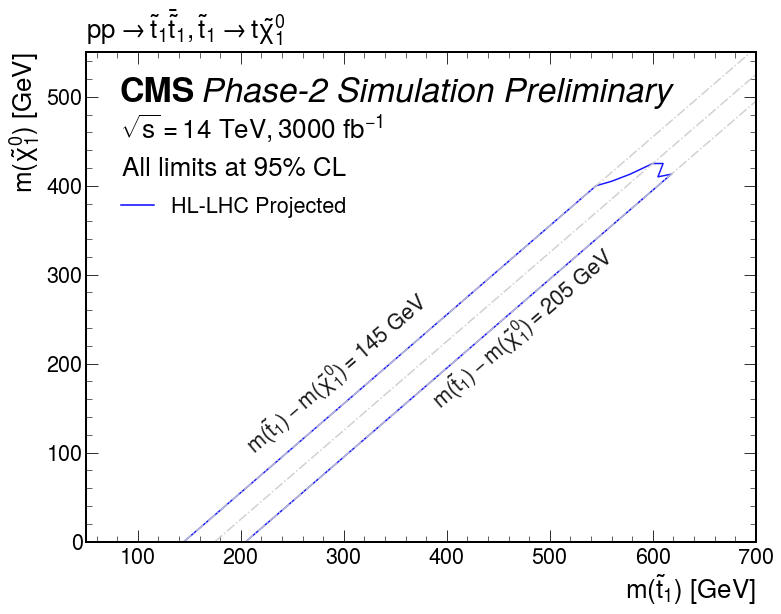

In [9]:
# load atlas style
plt.style.use(hep.style.CMS)

fig, ax = plt.subplots(figsize=(12,9))

## Axes
ax.set_xlim(xrange)
ax.set_ylim(yrange)

# add process label
ax.text(0.0, 1.01, processLabel, transform = ax.transAxes, va='bottom')

# Set up initial legend
leg1_elements = [matplotlib.lines.Line2D([0], [0], linestyle='--', color='k', label='Expected')]
leg1 = ax.legend(title="All limits at 95% CL", bbox_to_anchor=(0.42, 0.83))

# Create legend for the analyses added
leg2_elements = []

# ATLAS Labeling
atlas_label(ax, lumiLabel=lumiLabel)

leg2_elements.append(matplotlib.lines.Line2D([0], [0], linestyle='-', color='blue', label='HL-LHC Projected'))
ax.plot(x, y, linestyle='-', color='blue', alpha=0.9)
ax.plot(med_stop_ar, med_chi0_ar, linestyle='-', color='blue', alpha=0.9, label=' Projected')
ax.plot(x2,y2, linestyle='-', color='blue', alpha=0.9)

# leg2_elements.append(matplotlib.lines.Line2D([0], [0], linestyle='-', color='red', label='EPJC 81(2021) 970'))
# ax.plot(x3,y3, linestyle='-', color='red', alpha=0.9)
# ax.plot(x4, y4, linestyle='-', color='red', alpha=0.9)
# ax.plot(x5, y5, linestyle='-', color='red', alpha=0.9)
#ax.plot(reduced_X, reduced_Y, linestyle='-', color='red', alpha=0.9 )
#ax.plot(contour_X, contour_Y, linestyle='-', color='red', alpha=0.9 )
#ax.plot(atlas_X, atlas_Y, linestyle='-', color='green', alpha=0.9 )
## Draw Lines
kinematic_exclusion_145(ax)
kinematic_exclusion_175(ax)
kinematic_exclusion_205(ax)
## Axis Labels
hep.atlas.set_xlabel(xlabel)
hep.atlas.set_ylabel(ylabel)

# for multiple legends
ax.legend(loc='upper left', bbox_to_anchor=(0.02, 0.75), handles=leg2_elements, fontsize='small')
ax.add_artist(leg1)
plt.savefig('Ours.pdf')

In [7]:
x = []
y = []
for i in range(145,545) :
    x.append(i)
    y.append(i - 145)

x = array('d', x)
y = array('d', y)

x2 = []
y2 = []

for i in range(618,205,-1) :
    x2.append(i)
    y2.append(i - 205)

x2 = array('d', x2)
y2 = array('d', y2)

x3 = []
y3 = []

for i in range(145,265) :
    x3.append(i)
    y3.append(i - 145)

x3 = array('d', x3)
y3 = array('d', y3)

x4 = [265, 275, 285, 295, 295]
y4 = [120, 110, 100, 91, 90]

x4 = array('d', x4)
y4 = array('d', y4)

x5 = []
y5 = []

for i in range(295,205, -1) :
    x5.append(i)
    y5.append(i - 205)

x5 = array('d', x5)
y5 = array('d', y5)

In [9]:
fileptr = uproot.open('HEPData-ins1893826.root')
graph   = fileptr['Figure 9a (expected upper limit)']['Graph2D_y1;1']
X       = graph.member('fX')
Y       = graph.member('fY')
Z       = graph.member('fZ')

In [10]:
fileptr    = uproot.open('HEPData-ins1893826.root')
graph      = fileptr['Figure 9a (expected limit contour)']['Graph1D_y1;1']
contour_X = graph.member('fX')
contour_Y = graph.member('fY')

In [23]:
mass_pts = [[145 , 1],
[155 , 10],
[155 , 1],
[165 , 10],
[165 , 1],
[165 , 20],
[175 , 10],
[175 , 1],
[175 , 20],
[175 , 30],
[185 , 10],
[185 , 1],
[185 , 20],
[185 , 30],
[185 , 40],
[195 , 10],
[195 , 1],
[195 , 20],
[195 , 30],
[195 , 40],
[195 , 50],
[205 , 10],
[205 , 1],
[205 , 20],
[205 , 30],
[205 , 40],
[205 , 50],
[205 , 60],
[215 , 10],
[215 , 20],
[215 , 30],
[215 , 40],
[215 , 50],
[215 , 60],
[215 , 70],
[225 , 20],
[225 , 30],
[225 , 40],
[225 , 50],
[225 , 60],
[225 , 70],
[225 , 80],
[235 , 30],
[235 , 40],
[235 , 50],
[235 , 60],
[235 , 70],
[235 , 80],
[235 , 90],
[245 , 100],
[245 , 40],
[245 , 50],
[245 , 60],
[245 , 70],
[245 , 80],
[245 , 90],
[255 , 100],
[255 , 50],
[255 , 60],
[255 , 70],
[255 , 80],
[255 , 90],
[265 , 120],
[265 , 110],
[265 , 100],
[265 , 60],
[265 , 70],
[265 , 80],
[265 , 90],
[275 , 100],
[275 , 70],
[275 , 80],
[275 , 90],
[285 , 100],
[285 , 80],
[285 , 90],
[295 , 80],
[295 , 90],] 

In [24]:
reduced_X = []
reduced_Y = []
reduced_Z = []

for x,y,z in zip(X,Y,Z) :
    if not [x,y] in mass_pts : continue
    reduced_X.append(x)
    reduced_Y.append(y)
    reduced_Z.append(z)

In [16]:
reduced_X = array('f', reduced_X)
reduced_Y = array('f', reduced_Y)

In [61]:
reduced_X.index(295)
reduced_X[74]

295.0

In [62]:
reduced_Y[74]

90.0

In [115]:
fileptr = uproot.open('HEPData-ins1793461.root')
graph   = fileptr['stop_exp']['Graph1D_y1;1']
X       = graph.member('fX')
Y       = graph.member('fY')

In [116]:
atlas_X = []
atlas_Y = []
for x,y in zip(X,Y) :
    if x-y < 145 or x-y > 175 :
        continue
    else :
        atlas_X.append(x)
        atlas_Y.append(y)
        
atlas_X = array('f', X)
atlas_Y = array('f', Y)

In [70]:
median =  [0.0007137104462592316, 0.0008931138697584552, 0.001242301193997264, 0.0014850953011773527, 0.003007248160429299, 0.004142961464822292, 0.005723638284919716, 0.007731064688414335, 0.01099383893932923, 0.017174743114388838, 0.023624251948952613, 0.08085522976254053, 0.16899905808228663, 0.3302840143442154, 0.5633943974971771, 0.9712267816066742, 1.6047925552740159, 2.569022991516899, 4.1093455472225955, 6.718361854553223, 10.35810661315918, 16.692704768513195, 24.39692568749271, 38.274092804605075]

In [72]:
np.argmax(np.array(median) > 1)

16

In [74]:
median[15]

0.9712267816066742

In [75]:
from scipy.interpolate import interp1d
fst = np.array([4, 4, 1, 3, 1, 4, 3, 2, 5, 2])
snd = np.array([1, 1, 3, 4, 1, 5, 5, 5, 4, 3])
linfit = interp1d([1,5], np.vstack([fst, snd]), axis=0)